In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv(r"D:\Egaletly Solution ( AI )\Machine Learning\T1.csv")

In [3]:
df.head(3)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789


In [4]:
df.shape

(50530, 5)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [7]:
df.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [8]:
numerical= df.select_dtypes(exclude="O")

In [9]:
numerical

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645905,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
50525,2963.980957,11.404030,3397.190793,80.502724
50526,1684.353027,7.332648,1173.055771,84.062599
50527,2201.106934,8.435358,1788.284755,84.742500
50528,2515.694092,9.421366,2418.382503,84.297913


<Figure size 1000x500 with 0 Axes>

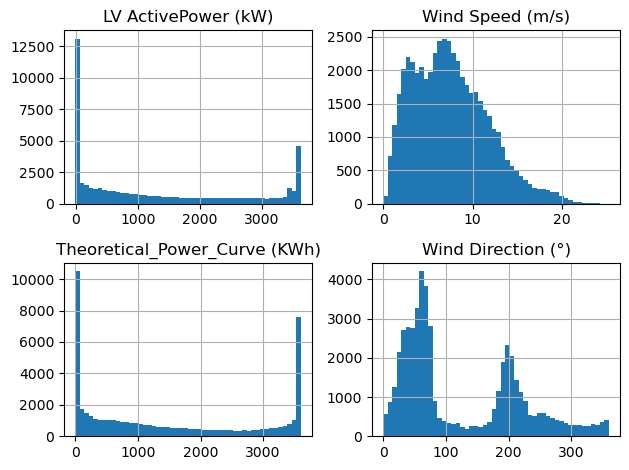

In [10]:
plt.figure(figsize=(10,5))
numerical.hist(bins=50)
plt.tight_layout()
plt.show()

In [11]:
numerical.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

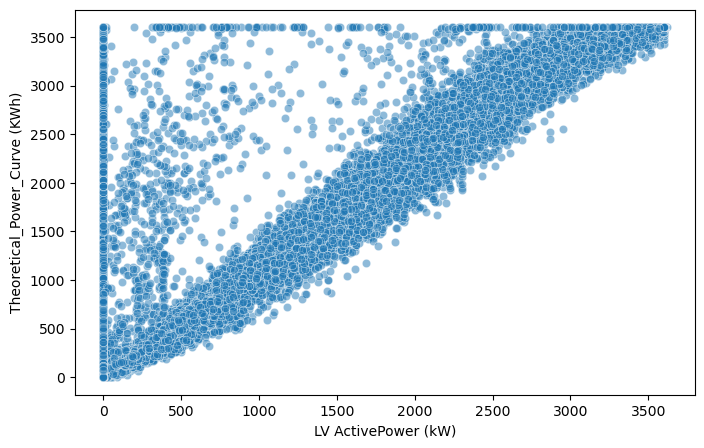

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="LV ActivePower (kW)",y="Theoretical_Power_Curve (KWh)",data=df,alpha=0.5,)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X = numerical.drop(['Theoretical_Power_Curve (KWh)'], axis='columns')
y = numerical[['Theoretical_Power_Curve (KWh)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)'], dtype='object')

In [17]:
X_train= pd.DataFrame(X_train_scaled,columns=X.columns)
X_test= pd.DataFrame(X_test_scaled,columns=X.columns)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
krr= KNeighborsRegressor(n_neighbors=3)

In [41]:
krr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [42]:
krr.score(X_test,y_test)*100

99.89003078409065

In [43]:
krr.score(X_train,y_train)*100

99.9868616581265